In [103]:
import sys
import os

import pydent
from pydent import AqSession, models
from pydent.models import Sample, Item, Plan

sys.path.append("ext-plan-pydent")
from plans import ExternalPlan

import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *

pd.options.display.max_rows = 999
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 100

In [2]:
session = ExternalPlan.create_session("production")

Connected to Aquarium at http://52.27.43.242/ using pydent version 0.0.35
Logged in as Devin Strickland



In [3]:
obj = session.ObjectType.find_by_name("Yeast Plate")
print(obj)

{'cleanup': 'No cleanup information',
 'columns': None,
 'cost': 1.0,
 'created_at': '2014-02-13T14:04:32.000-08:00',
 'data': 'No data',
 'description': 'Yeast Plate',
 'handler': 'sample_container',
 'id': 350,
 'image': '',
 'max': 100000,
 'min': 0,
 'name': 'Yeast Plate',
 'prefix': 'DFP',
 'release_description': '',
 'release_method': 'return',
 'rid': 5,
 'rows': None,
 'safety': 'No safety information',
 'sample_type_id': 5,
 'unit': 'Yeast Strain',
 'updated_at': '2015-03-02T10:44:55.000-08:00',
 'vendor': 'No vendor information'}


In [4]:
sample_type = session.SampleType.find_by_name("Yeast Strain")
print(sample_type)

{'created_at': '2013-10-16T14:37:29.000-07:00',
 'description': 'A strain of yeast distinguished from others by genomic or '
                'plasmid modifications',
 'field_types': <Many (model=FieldType, callback=where_callback, params=(<function SampleType.<lambda> at 0x110550a60>,))>,
 'id': 5,
 'name': 'Yeast Strain',
 'rid': 7,
 'samples': <HasMany (model=Sample, callback=where_callback, params=(<function HasMany.__init__.<locals>.callback_args at 0x1105509d8>,))>,
 'updated_at': '2015-12-08T17:40:57.000-08:00'}


In [26]:
offset = 0
limit = 100
all_items = []

while True:
    items = session.Item.where({"object_type_id": obj.id}, opts={"offset": offset, "limit": limit})
    if not items: break
    all_items += items
    offset += limit
    print(len(all_items))
#     if offset > 100: break
    
len(all_items)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6184


6184

In [30]:
all_item_ids = list([i.id for i in all_items])

In [41]:
def find_in_batches(cls, conditions):
    offset = 0
    limit = 100
    all_objs = []

    while True:
        objs = cls.where(conditions, opts={"offset": offset, "limit": limit})
        if not objs: break
        all_objs += objs
        offset += limit
        print(len(all_objs))
        
    return all_objs

In [42]:
conditions = {'key': 'num_colonies', 'parent_class': 'Item', 'parent_id': all_item_ids}
all_das = find_in_batches(session.DataAssociation, conditions)

100
200
300
400
500
600
700
800
900
1000
1028


In [40]:
print(session.DataAssociation.find(100000))

{'created_at': '2017-07-13T21:02:42.000-07:00',
 'id': 100000,
 'key': 'from',
 'object': '{"from": 94533}',
 'parent_class': 'Item',
 'parent_id': 94566,
 'rid': 40290,
 'updated_at': '2017-07-13T21:02:42.000-07:00',
 'upload': <HasOne (model=Upload, callback_args=lambda self: self.upload_id)>,
 'upload_id': None}


In [48]:
colony_cts = [int(da.object.get('num_colonies')) for da in all_das]

In [49]:
print(colony_cts)

[4, 1, 3, 140, 1500, 1, 7, 400, 23, 12, 5, 11, 300, 200, 90, 110, 25, 25, 20, 50, 65, 50, 20, 1, 200, 60, 130, 120, 80, 160, 25, 120, 0, 5, 6, 16, 40, 13, 6, 76, 10, 14, 40, 0, 0, 60, 65, 35, 50, 25, 100, 10, 10, 40, 1, 33, 220, 90, 34, 5, 774, 50, 60, 30, 35, 500, 15, 15, 15, 35, 120, 5, 35, 60, 4, 43, 42, 433, 473, 5, 100, 13, 25, 150, 85, 37, 21, 35, 300, 11, 25, 570, 22, 55, 25, 20, 23, 2, 3, 300, 450, 520, 2, 45, 14, 7, 16, 27, 230, 1380, 300, 500, 100, 120, 4, 8, 41, 0, 0, 0, 0, 0, 45, 980, 277, 637, 497, 1386, 482, 619, 170, 2, 54, 10, 10, 10, 10, 35, 540, 54, 3, 162, 2772, 12, 237, 319, 135, 15, 24, 2, 2, 4, 35, 200, 450, 98, 400, 300, 2, 31, 2, 1, 17, 4, 800, 60, 75, 60, 60, 22, 5, 82, 78, 26, 21, 64, 2, 450, 273, 5, 4, 32, 3, 25, 230, 65, 70, 60, 46, 7, 9, 13, 2, 9, 53, 45, 55, 13, 95, 19, 2, 50, 300, 3, 670, 1, 5, 2000, 2, 650, 12, 8, 45, 38, 29, 165, 28, 1500, 1, 15, 2, 75, 1, 2, 5, 30, 4, 23, 95, 40, 16, 300, 60, 40, 130, 50, 70, 38, 75, 39, 36, 1, 252, 9, 4, 4, 3, 60, 8, 

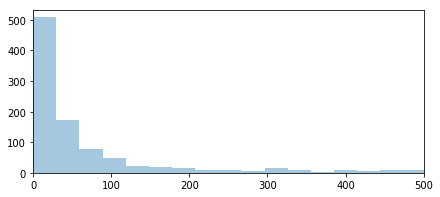

In [58]:
f, axes = plt.subplots(1, 1, figsize=(7, 3))
sns.distplot(colony_cts, kde=False, bins=100)
axes.set(xlim=[0,500])
plt.show()

In [66]:
all_sample_ids = [i.sample_id for i in all_items]
conditions = {'id': all_sample_ids}
all_samples = find_in_batches(session.Sample, conditions)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3858


In [60]:
da = all_das[-1]
print(da)

{'created_at': '2019-06-03T08:34:26.000-07:00',
 'id': 645811,
 'key': 'num_colonies',
 'object': '{"num_colonies": 13}',
 'parent_class': 'Item',
 'parent_id': 377378,
 'rid': 42346,
 'updated_at': '2019-06-03T08:34:26.000-07:00',
 'upload': <HasOne (model=Upload, callback_args=lambda self: self.upload_id)>,
 'upload_id': None}


In [63]:
i = [i for i in all_items if i.id == da.parent_id][0]
print(i)

{'created_at': '2019-05-30T15:41:25.000-07:00',
 'data': None,
 'data_associations': <HasManyGeneric (model=DataAssociation, callback=where_callback, params=(<function HasMany.__init__.<locals>.callback_args at 0x110530f28>,))>,
 'id': 377378,
 'inuse': 0,
 'is_part': False,
 'location': 'DFP.3.0.4',
 'object_type': <HasOne (model=ObjectType, callback_args=lambda self: self.object_type_id)>,
 'object_type_id': 350,
 'quantity': 1,
 'rid': 13972,
 'sample': <HasOne (model=Sample, callback_args=lambda self: self.sample_id)>,
 'sample_id': 29712,
 'updated_at': '2019-06-03T08:34:27.000-07:00'}


In [67]:
s = [s for s in all_samples if s.id == i.sample_id][0]
print(s)

{'created_at': '2019-05-20T13:40:35.000-07:00',
 'data': None,
 'description': 'New sample type description',
 'field_values': <Many (model=FieldValue, callback=where_callback, params=(<function Sample.<lambda> at 0x110550378>,))>,
 'id': 29712,
 'items': <HasMany (model=Item, callback=where_callback, params=(<function HasMany.__init__.<locals>.callback_args at 0x1105502f0>,))>,
 'name': 'EBY102 SynAg_alpha_V3_MYC3_JID',
 'project': 'JA SynAg',
 'rid': 51716,
 'sample_type': <HasOne (model=SampleType, callback_args=lambda self: self.sample_type_id)>,
 'sample_type_id': 5,
 'updated_at': '2019-05-20T13:49:05.000-07:00',
 'user_id': 291}


In [77]:
all_sample_ids = [s.id for s in all_samples]

In [79]:
conditions = {'parent_class': 'Sample', 'parent_id': all_sample_ids}
fvs = find_in_batches(session.FieldValue, conditions)
for fv in fvs[:3]:
    print(fv)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [95]:
def get_value(subset_fvs, name):
    this_fv = [f for f in subset_fvs if f.name == name]
    if this_fv:
        this_fv = this_fv[0]
        if this_fv.child_sample_id:
            return this_fv.child_sample_name
        else:
            return this_fv.value

In [102]:
columns = [
    "item_id",
    "num_colonies",
    "sample_name",
    "integrated_marker",
    "plasmid_marker",
    "media",
    "parent",
    "integrant",
    "plasmid"
]
data = []

for da in all_das:
    row = {}
    i = [i for i in all_items if i.id == da.parent_id][0]
    s = [s for s in all_samples if s.id == i.sample_id][0]
    these_fvs = [f for f in fvs if f.parent_id == s.id]

    if i and s:
        row["item_id"] = i.id
        row["num_colonies"] = int(da.object.get('num_colonies'))
        row["sample_name"] = s.name
        row["integrated_marker"] = get_value(these_fvs, 'Integrated Marker(s)')
        row["plasmid_marker"] = get_value(these_fvs, 'Plasmid Marker(s)')
        row["media"] = get_value(these_fvs, 'Media')
        row["parent"] = get_value(these_fvs, 'Parent')
        row["integrant"] = get_value(these_fvs, 'Integrant')
        row["plasmid"] = get_value(these_fvs, 'Plasmid')
        
        data.append(row)

In [104]:
df = pd.DataFrame(columns=columns, data=data)
df.sort_values(by="num_colonies")

,item_id,num_colonies,sample_name,integrated_marker,plasmid_marker,media,parent,integrant,plasmid
118,108980,0,"w303a; pACT1::z4EV; pMOD URA pMin3xGbox yeGFP-PEST; HIS pCyc1::MYC3-NLS, pGalZ4::NLS-NPR3","HIS, TRP",,,None,None,None
32,103735,0,W303A| BAR1-KO + pGPD-POG1 + pFUS1-mTurquoise,URA,,,18088: W303A|BAR1-KO + pGPD-POG1,20952: pMODU-pFUS1-mTurquoise,None
258,119036,0,W303A| 1350 + BAR1KO + pGPD-TIR1_DM + pGPD-POG1 + pFUS1-MFalpha1 + pGALZ4-PPZ1 + pCYC1real-PPZ1,leu,,,22416: W303A| 1350 + BAR1KO + pGPD-TIR1_DM + pGPD-POG1 + pFUS1-MFalpha1 + pGALZ4-PPZ1,22483: pMODL-pCYC1real-PPZ1,None
259,119037,0,v2_pETCON_MATalpha_IAA17_Strain,trp,,,10341: EBY102alpha[-Sag1]+CRE_plasmid_Bsingle,22440: pETCON_MATalpha_v2_IAA17,None
43,104090,0,W303A| BAR1-KO + pGPD-POG1 + pFUS1-mTurquoise,URA,,,18088: W303A|BAR1-KO + pGPD-POG1,20952: pMODU-pFUS1-mTurquoise,None
117,109399,0,W303A|BAR1-KO + pGPD-POG1 + pGPD-TIR1_DM + pADH1-RGR-c3 + pCYC1-dCas9-IAA17-VP64 + pCYC1-GFP,Leu,,,21578: W303A|BAR1-KO + pGPD-POG1 + pGPD-TIR1_DM + pADH1-RGR-c3 + pCYC1-dCas9-IAA17-VP64,21850: pMODL-pCYC1-yeGFP,None
119,108977,0,W303alpha; pACT1::Z4EV; pGalZ4::Swi6DeltaC50; pCUP1::Far1mut,LEU/TRP/KAN,,,21648: W303alpha; pACT1::Z4EV; pGalZ4::Swi6DeltaC50,None,None
120,108978,0,W303alpha; pACT1::Z4EV; pGalZ4::Swi6DeltaC50; pCUP1::Wwm1,LEU/TRP/KAN,,,21648: W303alpha; pACT1::Z4EV; pGalZ4::Swi6DeltaC50,None,None
121,108979,0,W303alpha; pACT1::Z4EV; pGalZ4::Swi6DeltaC50; pCUP1::Tub2,LEU/TRP/KAN,,,21648: W303alpha; pACT1::Z4EV; pGalZ4::Swi6DeltaC50,21258: pMOD TRP pCup1::Tub2,None
44,104091,0,W303A | BAR1-KO + pGPD-POG1 + pFUS1-yeVenus,HIS,,,18088: W303A|BAR1-KO + pGPD-POG1,5053: pMOD3-pFUS1(435)-yEVenus,None


In [84]:
len(fvs)

34579

In [92]:
sample_fvs = [f for f in fvs if f.child_sample_id][:10]
for f in sample_fvs:
    print(f)

{'allowable_field_type': <HasOne (model=AllowableFieldType, callback_args=lambda self: self.allowable_field_type_id)>,
 'allowable_field_type_id': None,
 'child_item_id': None,
 'child_sample_id': 2053,
 'child_sample_name': '2053: TCYC1_F',
 'column': None,
 'created_at': '2016-05-09T20:52:01.000-07:00',
 'field_type': <HasOne (model=FieldType, callback_args=lambda self: self.field_type_id)>,
 'field_type_id': None,
 'id': 118469,
 'item': <HasOne (model=Item, callback_args=lambda self: self.child_item_id)>,
 'name': 'QC Primer1',
 'operation': <HasOne (model=Operation, callback_args=lambda self: self.parent_id)>,
 'parent_class': 'Sample',
 'parent_id': 29,
 'parent_sample': <HasOne (model=Sample, callback_args=lambda self: self.parent_id)>,
 'rid': 51856,
 'role': None,
 'row': None,
 'sample': <HasOne (model=Sample, callback_args=lambda self: self.child_sample_id)>,
 'sid': '2053: TCYC1_F',
 'successors': [],
 'updated_at': '2016-05-09T20:52:01.000-07:00',
 'value': None,
 'wires_a

{'allowable_field_type': <HasOne (model=AllowableFieldType, callback_args=lambda self: self.allowable_field_type_id)>,
 'allowable_field_type_id': None,
 'child_item_id': None,
 'child_sample_id': 30,
 'child_sample_name': '30: W303alpha',
 'column': None,
 'created_at': '2016-05-09T20:52:01.000-07:00',
 'field_type': <HasOne (model=FieldType, callback_args=lambda self: self.field_type_id)>,
 'field_type_id': None,
 'id': 118534,
 'item': <HasOne (model=Item, callback_args=lambda self: self.child_item_id)>,
 'name': 'Parent',
 'operation': <HasOne (model=Operation, callback_args=lambda self: self.parent_id)>,
 'parent_class': 'Sample',
 'parent_id': 443,
 'parent_sample': <HasOne (model=Sample, callback_args=lambda self: self.parent_id)>,
 'rid': 51897,
 'role': None,
 'row': None,
 'sample': <HasOne (model=Sample, callback_args=lambda self: self.child_sample_id)>,
 'sid': '30: W303alpha',
 'successors': [],
 'updated_at': '2016-05-09T20:52:01.000-07:00',
 'value': None,
 'wires_as_des